## Imports

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mick/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # For sentiment analysis
import pickle # For loaded dataset from pickle file
import tqdm # Progress bar
from collections import Counter # Handy addon
from pprint import pprint # Useful to print JSON objects
import numpy as np

In [8]:
# This loads the file that you want, might take several seconds (up to a minute)

with open("news_sentiment.pickle", "rb") as f:
    articles = pickle.load(f, encoding='bytes')
print(len(articles), "articles were loaded")
print("Example article:")
pprint(articles[1040])


57767 articles were loaded
Example article:
{b'news_topic': b'ISIS War',
 'introductions': [{'person': 'Bashar al-Assad',
                    'text': 'President',
                    'wdid': 'Q44329'},
                   {'person': 'Emile Hokayem', 'text': 'in Foreign Policy'},
                   {'person': 'Ahrar al Sham',
                    'text': 'the most important groups',
                    'wdid': 'Q860943'},
                   {'person': 'Vladimir Putin',
                    'text': 'Russian President',
                    'wdid': 'Q7747'},
                   {'person': 'Barack Obama',
                    'text': 'U.S. President',
                    'wdid': 'Q76'},
                   {'person': 'Osama Abu Zeid',
                    'text': 'a senior adviser to the moderate Free Syrian '
                            'Army'},
                   {'person': 'Op-Ed',
                    'text': 'for The Washington Post',
                    'wdid': 'Q2602337'},
                  

In [10]:
# separate articles from the two stories
ISIS_articles = []
Brexit_articles = []
for a in articles:
    if a[b'news_topic'] == b'ISIS War':
        ISIS_articles.append(a)
    else:
        Brexit_articles.append(a)
        
print(len(ISIS_articles), " articles from ISIS War and ", len(Brexit_articles), "articles from Brexit were loaded")

39206  articles from ISIS War and  18561 articles from Brexit were loaded


In [11]:
# get only articles from one story, you can change this
articles = ISIS_articles

## Extract introductions, and obtain their sentiment

In [12]:
analyzer = SentimentIntensityAnalyzer()

total_introductions = []
for a in articles:
    for intro in a.get('introductions', []):
        intro['source'] = a['source']
        total_introductions.append(intro)

for intro in tqdm.tqdm_notebook(total_introductions):
    intro['sentiment'] = analyzer.polarity_scores(intro['text'])['compound']

In [14]:
# Example some sentiment for some of the introductions

subsample = np.random.choice(total_introductions, 100)
for intro in subsample:
    if intro['sentiment'] != 0:
        print("---------------")
        print("Entity mentionned:", intro['person'])
        print(intro['text'])
        print("Sentiment:", intro['sentiment'])

---------------
Entity mentionned: Antonio Guterres
UN chief encouraged by restart of Syria peace talks
Sentiment: 0.7184
---------------
Entity mentionned: Ash Carter
Defense Secretary
Sentiment: 0.128
---------------
Entity mentionned: Fethullah Gulen
who the Turkish government blames for the 2016 coup attempt
Sentiment: -0.4019
---------------
Entity mentionned: Najib Mikati
whose policy of ' dissociation ' from 
 Syria 's conflict next door has come under growing strain
Sentiment: -0.2023
---------------
Entity mentionned: Cameron Gives Ground
David Cameron backed down from
Sentiment: 0.0258
---------------
Entity mentionned: Saad al-Hariri
who announced his resignation as Lebanon 's Prime Minister while on a visit to Saudi Arabia
Sentiment: -0.296
---------------
Entity mentionned: Ahmad Yaziji
a civil defense chief in the nearby town of Jisr al - Shughour
Sentiment: 0.128
---------------
Entity mentionned: Ibrahim Kalin
spokesman for President Tayyip Erdogan , and U.S. National S

## Build a 2-dimensional object containing sentiment per entity, per source

In [15]:
ent_source_sent = {}

for intro in total_introductions:
    p = intro['person']
    s = intro['source']
    if p not in ent_source_sent:
        ent_source_sent[p] = {}
    if s not in ent_source_sent[p]:
        ent_source_sent[p][s] = []
    ent_source_sent[p][s].append(intro['sentiment'])

In [17]:
# An example of how one entity (a city) is described by different sources

print(ent_source_sent['Aleppo'])

{'bbc.co.uk': [0.0516, 0.0, -0.1531, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1531, -0.3182, -0.5994, -0.5994, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0], 'cnn.com': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0516, 0.0, 0.0, 0.0, -0.5994, -0.3818, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7096, -0.7096, 0.0, 0.0, 0.0, -0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, -0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1779], 'theguardian.com': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7096, 0.0, -0.1531, 0.0], 'middleeasteye.net': [-0.1531, 0.0, 0.0, 0.0, 0.0, -0.1531, -0.4404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3612, 0.0, 0.0, -0.1531, 0.0, 0.0, -0.1531, 0.0, 0.0, -0.1531, -0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [19]:
# We get rid of entities that don't contain enough data

entities_kept = []

for entity in ent_source_sent.keys():
    sentiments = ent_source_sent[entity]
    total_size = sum([len(sentiments[source]) for source in sentiments.keys()])
    if total_size >= 3:
        entities_kept.append(entity)
        
print("We will keep a total of", len(entities_kept), " / ", len(ent_source_sent.keys()) ,"in our dataset")

sources = set([])
for entity in entities_kept:
    sources|= set(ent_source_sent[entity].keys())
sources = list(sources)

print("We have ", len(sources), "sources: ", sources)

We will keep a total of 7852  /  25128 in our dataset
We have  22 sources:  ['middleeasteye.net', 'ap.org', 'techcrunch.com', 'nytimes.com', 'businessinsider.in', 'aa.com.tr', 'bbc.co.uk', 'chinadaily.com.cn', 'cnn.com', 'independent.co.uk', 'wikinews.org', 'foxnews.com', 'washingtonpost.com', 'aljazeera.com', 'telegraph.co.uk', 'bloomberg.com', 'theguardian.com', 'latimes.com', 'reuters.com', 'rt.com', 'france24.com', 'allafrica.com']


## We create the array we will use in our sparse model

In [139]:
# Parameters: changing these affects the results you get
Pos_neg_ratio = 2.0
overall_ratio = 0.15
pos_threshold = 0.15
neg_threshold = -0.15

N = len(entities_kept)
M = len(sources)
A = np.zeros((N, M))

sentiment_counts = Counter()

source2j = {source: j for j, source in enumerate(sources)}

for i, entity in enumerate(entities_kept):
    for source in ent_source_sent[entity].keys():
        sent_array = np.array(ent_source_sent[entity][source])
        N_pos = float(len(np.where(sent_array > pos_threshold)[0]))
        N_neg = float(len(np.where(sent_array < neg_threshold)[0]))
        T = float(len(sent_array))
        aggregate_sentiment = 0
        if N_pos > Pos_neg_ratio*N_neg and N_pos > overall_ratio*T:
            aggregate_sentiment = 1
        elif N_neg > Pos_neg_ratio*N_pos and N_neg > overall_ratio*T:
            aggregate_sentiment = -1
        j = source2j[source]
        
        A[i,j] = aggregate_sentiment
        
        sentiment_counts[aggregate_sentiment] += 1

print("We allocated some sentiment in this matrix, the repartition is:", sentiment_counts)
print("A: ", A.shape)

We allocated some sentiment in this matrix, the repartition is: Counter({0: 19062, 1: 3650, -1: 2669})
A:  (7852, 22)


## Model source similarity

In [140]:
# Write code that uses this matrix (entities, sources) to compute
# source similarity visible in bias of the way they describe entities

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
A_std = scaler.fit_transform(A)

In [142]:
def print_positive(precision, sources):
    for (i, j) in zip(*np.where(precision > 0)):
        if i > j:
            print(sources[i], sources[j])

## Default implementation

In [116]:
from sklearn.covariance import GraphLasso
def default_glasso(data, l1_lambda):
    graph_lasso = GraphLasso(alpha=l1_lambda)
    graph_lasso.fit(data)
    return graph_lasso.get_precision()



## Our implementation

In [133]:
from GraphicalLasso import GraphicalLasso as GL
from sklearn import linear_model
def graphical_lasso(data, l1_lambda):
    gl = GL(l1_solver_f=linear_model.Lasso)
    S = np.cov(data.T)
    return gl.fit(S, l1_lambda)

In [146]:
## Default
for i in range(3,10):
    l1_lambda = 10**(-i)
    print("Lamda: ", l1_lambda)
    default_graph = default_glasso(A_std,l1_lambda)
    print_positive(default_graph, sources)
    print("----")

Lamda:  0.001
techcrunch.com middleeasteye.net
techcrunch.com ap.org
nytimes.com middleeasteye.net
nytimes.com ap.org
aa.com.tr techcrunch.com
bbc.co.uk ap.org
bbc.co.uk techcrunch.com
chinadaily.com.cn techcrunch.com
chinadaily.com.cn nytimes.com
cnn.com ap.org
cnn.com chinadaily.com.cn
independent.co.uk techcrunch.com
wikinews.org ap.org
wikinews.org techcrunch.com
wikinews.org businessinsider.in
wikinews.org independent.co.uk
foxnews.com middleeasteye.net
foxnews.com techcrunch.com
foxnews.com businessinsider.in
washingtonpost.com middleeasteye.net
washingtonpost.com chinadaily.com.cn
aljazeera.com techcrunch.com
theguardian.com techcrunch.com
latimes.com techcrunch.com
latimes.com telegraph.co.uk
latimes.com bloomberg.com
reuters.com ap.org
reuters.com techcrunch.com
reuters.com wikinews.org
reuters.com latimes.com
rt.com ap.org
rt.com businessinsider.in
rt.com latimes.com
france24.com ap.org
france24.com techcrunch.com
france24.com wikinews.org
france24.com theguardian.com
france2

aljazeera.com techcrunch.com
telegraph.co.uk chinadaily.com.cn
theguardian.com techcrunch.com
latimes.com techcrunch.com
latimes.com nytimes.com
latimes.com cnn.com
latimes.com telegraph.co.uk
latimes.com bloomberg.com
reuters.com ap.org
reuters.com techcrunch.com
reuters.com wikinews.org
reuters.com latimes.com
rt.com ap.org
rt.com businessinsider.in
rt.com latimes.com
france24.com ap.org
france24.com techcrunch.com
france24.com wikinews.org
france24.com theguardian.com
france24.com latimes.com
allafrica.com middleeasteye.net
allafrica.com techcrunch.com
allafrica.com nytimes.com
allafrica.com businessinsider.in
allafrica.com wikinews.org
allafrica.com theguardian.com
allafrica.com reuters.com
allafrica.com france24.com
----


In [126]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [145]:
## Default

for i in range(0,5):
    l1_lambda = 10**(-i)
    print("Lamda: ", l1_lambda)
    theta_estimated = graphical_lasso(A_std, l1_lambda=l1_lambda)
    print_positive(theta_estimated, sources)
    print("----")

Lamda:  1
----
Lamda:  0.1
----
Lamda:  0.01
----
Lamda:  0.001
nytimes.com ap.org
nytimes.com techcrunch.com
aa.com.tr ap.org
aa.com.tr techcrunch.com
aa.com.tr businessinsider.in
bbc.co.uk ap.org
bbc.co.uk techcrunch.com
bbc.co.uk businessinsider.in
chinadaily.com.cn techcrunch.com
chinadaily.com.cn nytimes.com
chinadaily.com.cn businessinsider.in
cnn.com ap.org
cnn.com techcrunch.com
cnn.com chinadaily.com.cn
independent.co.uk techcrunch.com
independent.co.uk businessinsider.in
wikinews.org ap.org
wikinews.org techcrunch.com
wikinews.org businessinsider.in
wikinews.org independent.co.uk
foxnews.com techcrunch.com
foxnews.com businessinsider.in
foxnews.com chinadaily.com.cn
foxnews.com wikinews.org
washingtonpost.com middleeasteye.net
washingtonpost.com techcrunch.com
washingtonpost.com chinadaily.com.cn
washingtonpost.com wikinews.org
aljazeera.com techcrunch.com
aljazeera.com nytimes.com
aljazeera.com wikinews.org
telegraph.co.uk techcrunch.com
telegraph.co.uk chinadaily.com.cn
tel

In [129]:
def plot_estimated_graph(graph, ticks, vmax=10):
    sns.set(style="white")

    # Generate a large random dataset
    I = pd.Index(ticks, name="rows")
    C = pd.Index(ticks, name="columns")
    graph_frame = pd.DataFrame(data=graph, index=I, columns=C)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(graph, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(graph_frame, mask=mask, cmap=cmap, vmax=vmax, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.show()

In [130]:
def plot_network(graph, labels):
    G=nx.Graph()
    
    for (i, j) in zip(*np.where(abs(graph) > 0.0)):
        if i > j:    
            G.add_edge(sources[i], sources[j], weight=graph[i][j])
 
    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

    pos=nx.spring_layout(G) # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G,pos,node_size=700)

    # edges
    nx.draw_networkx_edges(G,pos,edgelist=elarge,width=1)
    nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.5,edge_color='b',style='dashed')

    # labels
    nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

    plt.axis('off')
    plt.show() # display
    

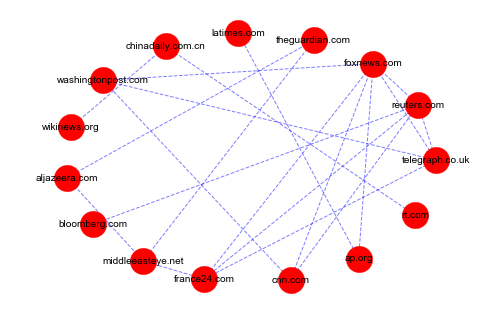

In [154]:
plot_network(default_glasso(A_std, 0.15), sources)

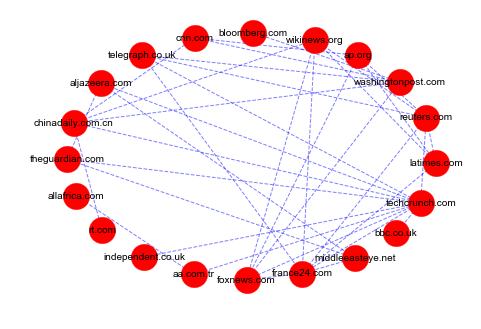

In [161]:
plot_network(graphical_lasso(A_std, 0.003), sources)


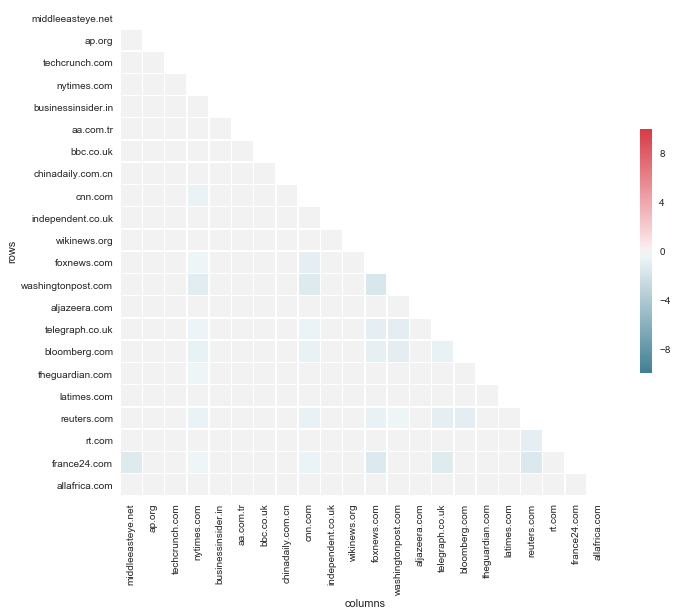

In [87]:
plot_estimated_graph(theta_estimated, sources)

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

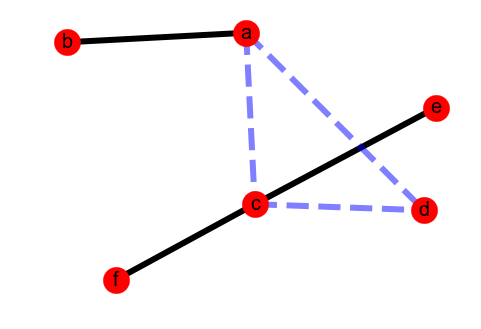